# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [5]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [6]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    X_pos=[]
    X_neg=[]
    for i in range(len(Y_train)):
      if Y_train[i]==1:
        X_pos.append(X_train[i])
      else:
        X_neg.append(X_train[i])
    mean_pos=np.mean(X_pos,axis=0)
    mean_neg=np.mean(X_neg,axis=0)
    y_pred=[]
    y_pos=np.count_nonzero(Y_train== 1)/len(Y_train)
    y_neg=np.count_nonzero(Y_train== -1)/len(Y_train)
    for i in range(len(X_test)):
      a=np.exp(-0.5*np.sum((X_test[i]-mean_pos)**2))/(2*np.pi)
      b=np.exp(-0.5*np.sum((X_test[i]-mean_neg)**2))/(2*np.pi)
      pos_prob=(a*y_pos)/(a*y_pos+b*y_neg)
      if pos_prob>0.5:
        y_pred.append(1)
      else:
        y_pred.append(-1)
    return np.array(y_pred)

def Bayes1b(X_train, Y_train, X_test):
    X_pos=[]
    X_neg=[]
    for i in range(len(Y_train)):
      if Y_train[i]==1:
        X_pos.append(X_train[i])
      else:
        X_neg.append(X_train[i])
    mean_pos=np.mean(X_pos,axis=0)
    mean_neg=np.mean(X_neg,axis=0)
    y_pred=[]
    y_pos=np.count_nonzero(Y_train== 1)/len(Y_train)
    y_neg=np.count_nonzero(Y_train== -1)/len(Y_train)
    cov=np.cov(np.array(X_train)[:,0],np.array(X_train)[:,1])
    for i in range(len(X_test)):
      a=(np.exp(-0.5*(np.matmul(np.matmul((X_test[i]-mean_pos),cov),(X_test[i]-mean_pos).transpose()))))/((2*np.pi)**(cov.shape[0])*(np.abs(np.linalg.det(cov))**0.5))
      b=(np.exp(-0.5*(np.matmul(np.matmul((X_test[i]-mean_neg),cov),(X_test[i]-mean_neg).transpose()))))/((2*np.pi)**(cov.shape[0])*(np.abs(np.linalg.det(cov))**0.5))
      pos_prob=(a*y_pos)/(a*y_pos+b*y_neg)
      if pos_prob>0.5:
        y_pred.append(1)
      else:
        y_pred.append(-1)
    return np.array(y_pred)

def Bayes1c(X_train, Y_train, X_test):
    X_pos=[]
    X_neg=[]
    for i in range(len(Y_train)):
      if Y_train[i]==1:
        X_pos.append(X_train[i])
      else:
        X_neg.append(X_train[i])
    mean_pos=np.mean(X_pos,axis=0)
    mean_neg=np.mean(X_neg,axis=0)
    y_pred=[]
    y_pos=np.count_nonzero(Y_train== 1)/len(Y_train)
    y_neg=np.count_nonzero(Y_train== -1)/len(Y_train)
    cov_pos=np.cov(np.array(X_pos)[:,0],np.array(X_pos)[:,1])
    cov_neg=np.cov(np.array(X_neg)[:,0],np.array(X_neg)[:,1])
    for i in range(len(X_test)):
      a=(np.exp(-0.5*(np.matmul(np.matmul((X_test[i]-mean_pos),cov_pos),(X_test[i]-mean_pos).transpose()))))/((2*np.pi)**(cov_pos.shape[0])*(np.abs(np.linalg.det(cov_pos))**0.5))
      b=(np.exp(-0.5*(np.matmul(np.matmul((X_test[i]-mean_neg),cov_neg),(X_test[i]-mean_neg).transpose()))))/((2*np.pi)**(cov_neg.shape[0])*(np.abs(np.linalg.det(cov_neg))**0.5))
      pos_prob=(a*y_pos)/(a*y_pos+b*y_neg)
      if pos_prob>0.5:
        y_pred.append(1)
      else:
        y_pred.append(-1)
    return np.array(y_pred)
    


In [7]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)


**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets as 3x3 table, with appropriately named rows and columns.


In [9]:
data_1=np.load('/content/drive/My Drive/Data/dataset1_1.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])

Text(0.5, 1.0, 'Bayes1c for dataset1_3')

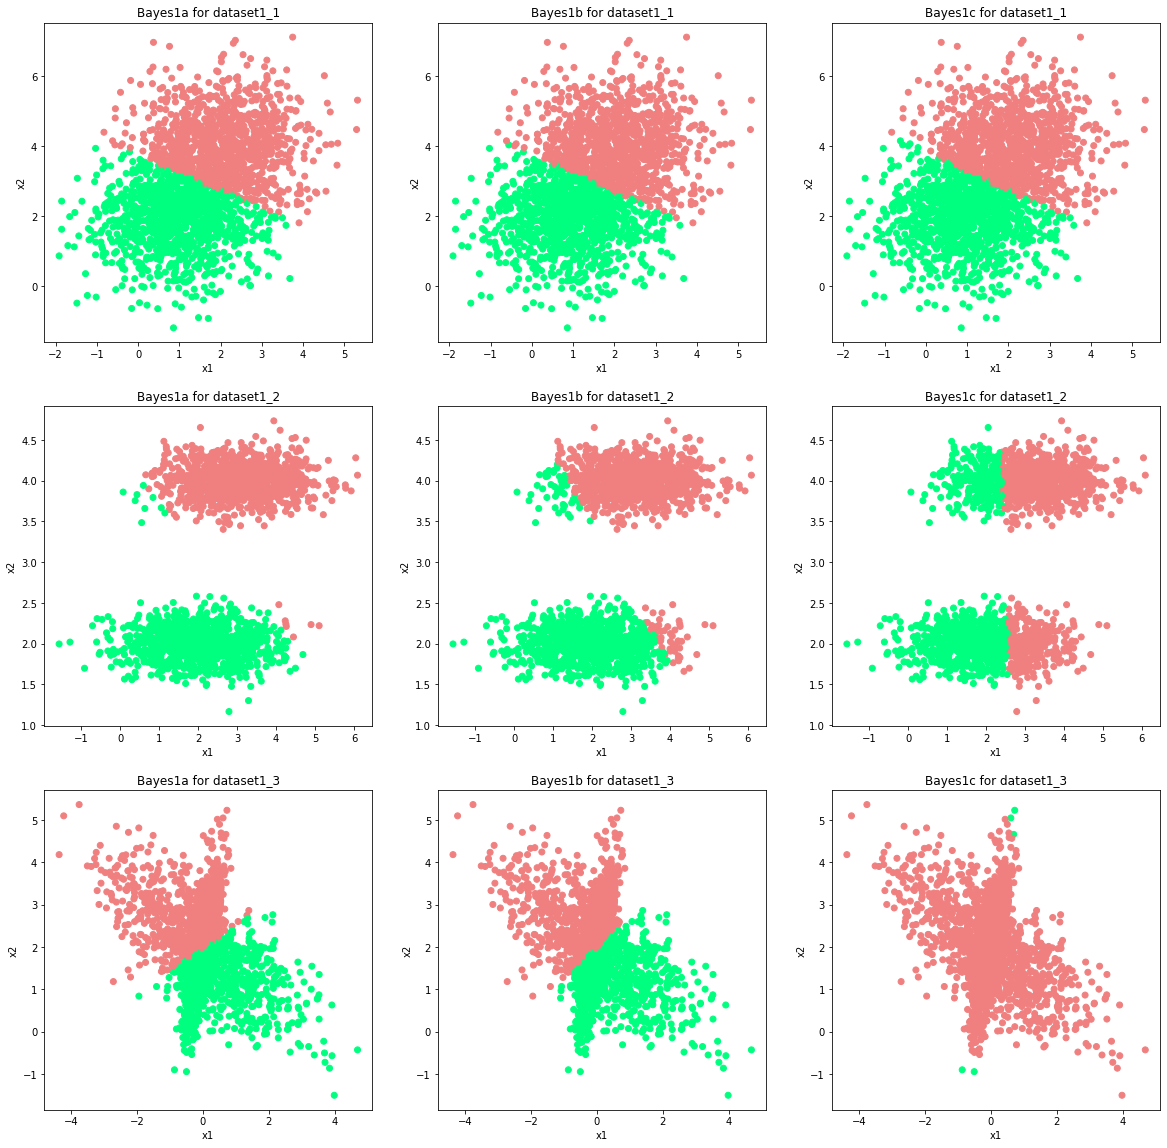

In [10]:
import matplotlib
data_1=np.load('/content/drive/My Drive/Data/dataset1_1.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])
plt.figure(figsize=[20,20])

y_pred=Bayes1a(a[0],a[1],a[2])
colors=['lightcoral','springgreen']
plt.subplot(3,3,1)
#plt.scatter(a[2][:,0],a[2][:,1], c=y_pred, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(a[0][:,0],a[0][:,1],c=Bayes1a(a[0],a[1],a[0]),cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Bayes1a for dataset1_1')


y_pred=Bayes1b(a[0],a[1],a[2])
plt.subplot(3,3,2)
#plt.scatter(a[2][:,0],a[2][:,1], c=y_pred, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(a[0][:,0],a[0][:,1],c=Bayes1b(a[0],a[1],a[0]),cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Bayes1b for dataset1_1')

y_pred=Bayes1c(a[0],a[1],a[2])
plt.subplot(3,3,3)
#plt.scatter(a[2][:,0],a[2][:,1], c=y_pred, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(a[0][:,0],a[0][:,1],c=Bayes1c(a[0],a[1],a[0]),cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Bayes1c for dataset1_1')

##plt.scatter(a[0][:,0],a[0][:,1], c=a[1], cmap=matplotlib.colors.ListedColormap(colors))

data_1=np.load('/content/drive/My Drive/Data/dataset1_2.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])

y_pred=Bayes1a(a[0],a[1],a[2])
colors=['lightcoral','springgreen']
plt.subplot(3,3,4)
#plt.scatter(a[2][:,0],a[2][:,1], c=y_pred, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(a[0][:,0],a[0][:,1],c=Bayes1a(a[0],a[1],a[0]),cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Bayes1a for dataset1_2')

y_pred=Bayes1b(a[0],a[1],a[2])
plt.subplot(3,3,5)
#plt.scatter(a[2][:,0],a[2][:,1], c=y_pred, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(a[0][:,0],a[0][:,1],c=Bayes1b(a[0],a[1],a[0]),cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Bayes1b for dataset1_2')

y_pred=Bayes1c(a[0],a[1],a[2])
plt.subplot(3,3,6)
#plt.scatter(a[2][:,0],a[2][:,1], c=y_pred, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(a[0][:,0],a[0][:,1],c=Bayes1c(a[0],a[1],a[0]),cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Bayes1c for dataset1_2')
##plt.scatter(a[0][:,0],a[0][:,1], c=a[1], cmap=matplotlib.colors.ListedColormap(colors))

data_1=np.load('/content/drive/My Drive/Data/dataset1_3.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])

y_pred=Bayes1a(a[0],a[1],a[2])
colors=['lightcoral','springgreen']
plt.subplot(3,3,7)
#plt.scatter(a[2][:,0],a[2][:,1], c=y_pred, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(a[0][:,0],a[0][:,1],c=Bayes1a(a[0],a[1],a[0]),cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Bayes1a for dataset1_3')

y_pred=Bayes1b(a[0],a[1],a[2])
plt.subplot(3,3,8)
#plt.scatter(a[2][:,0],a[2][:,1], c=y_pred, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(a[0][:,0],a[0][:,1],c=Bayes1b(a[0],a[1],a[0]),cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Bayes1b for dataset1_3')


y_pred=Bayes1c(a[0],a[1],a[2])
colors=['lightcoral','springgreen']
plt.subplot(3,3,9)
#plt.scatter(a[2][:,0],a[2][:,1], c=y_pred, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(a[0][:,0],a[0][:,1],c=Bayes1c(a[0],a[1],a[0]),cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Bayes1c for dataset1_3')

** Cell type : TextWrite ** 

**Observations:**

1) From the error table Bayes1a has the least error rate for all the three datasets and Bayes1c has the highest error rate compared to the rest. dataset1_2 with Bayes1a has the least error rate(0.849%), dataset1_3 with Bayes1c has the highest error rate(50.7%)

2) Bayes1a model preforms better in dataset1_2(0.849 error) this is because the data is clearly separated hence the covariance matrix is identity. Which is our assumption for Bayes1a.

3) Bayes1c is worst performer in dataset1_3 case this is because, the covariance is calculated different for different classes(positive and negative).

**Inferences:**

1) For dataset1_2 the covariance between x1 and x2 for both +1/-1 classes are zero, because there is no direct relationship between x1 and x2, Hence the covariance of identity matrix predicts correctly. Hence, low error(0.849)

2) For dataset1_3 the datapoints with negative label(-1) has no relation between X1 and X2(linear). Hence, applying Bayes1c is predicting bad, because Bayes1c assumes two different covariance matrices for two labels. 


### **Error rate table: (in percentages) 1-accuracy**

|Data | Bayes1a| Bayes1b | Bayes1c |
| --- | --- | --- | --- |
|dataset1_1| 12.6 | 12.6 | 12.9 |
|dataset1_2| 0.849 | 5.1 | 27.7|
|dataset1_3| 49.7| 49.7| 50.7 |



** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [11]:
# Cell type : CodeWrite
# Fill in functions in this cell


def Bayes2a(X_train, Y_train, X_test):
  L=np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
  a={i:[] for i in np.unique(Y_train)}
  b={i:[] for i in np.unique(Y_train)}
  pos_prob={i:[] for i in np.unique(Y_train)}
  y_pred=[]
  for i in range(len(Y_train)):
    a[Y_train[i]].append(X_train[i])
  for i in range(len(Y_train)):
    deno=0
    for j in np.unique(Y_train):
      b[j]=np.exp(-0.5*np.sum((X_test[i]-np.mean(a[j],axis=0))**2))/(2*np.pi)
    for k in np.unique(Y_train):
      deno=deno+(b[k]*(np.count_nonzero(Y_train==k)/len(Y_train)))
    for l in np.unique(Y_train):
      pos_prob[l]=b[l]*(np.count_nonzero(Y_train==l)/len(Y_train))/(deno)
    y_pred.append(np.argmin(np.matmul(np.array([v for k,v in pos_prob.items()]),np.transpose(L)))+1)
  return np.array(y_pred)
    
def Bayes2b(X_train, Y_train, X_test):
  L=np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
  a={i:[] for i in np.unique(Y_train)}
  b={i:[] for i in np.unique(Y_train)}
  pos_prob={i:[] for i in np.unique(Y_train)}
  y_pred=[]
  cov=np.cov(np.array(X_train)[:,0],np.array(X_train)[:,1])
  for i in range(len(Y_train)):
    a[Y_train[i]].append(X_train[i])
  for i in range(len(Y_train)):
    deno=0
    for j in np.unique(Y_train):
      b[j]=(np.exp(-0.5*(np.matmul(np.matmul((X_test[i]-np.mean(a[j],axis=0)),cov),(X_test[i]-np.mean(a[j],axis=0)).transpose()))))/((2*np.pi)**(cov.shape[0])*(np.abs(np.linalg.det(cov))**0.5))
    for k in np.unique(Y_train):
      deno=deno+(b[k]*(np.count_nonzero(Y_train==k)/len(Y_train)))
    for l in np.unique(Y_train):
      pos_prob[l]=b[l]*(np.count_nonzero(Y_train==l)/len(Y_train))/(deno)
    y_pred.append(np.argmin(np.matmul(np.array([v for k,v in pos_prob.items()]),np.transpose(L)))+1)
  return np.array(y_pred)

def Bayes2c(X_train, Y_train, X_test):
  L=np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
  a={i:[] for i in np.unique(Y_train)}
  b={i:[] for i in np.unique(Y_train)}
  cov={i:[] for i in np.unique(Y_train)}
  pos_prob={i:[] for i in np.unique(Y_train)}
  y_pred=[]
  for i in range(len(Y_train)):
    a[Y_train[i]].append(X_train[i])
  for i in np.unique(Y_train):
    cov[i]=np.cov(np.array(a[i])[:,0],np.array(a[i])[:,1])
  for i in range(len(Y_train)):
    deno=0
    for j in np.unique(Y_train):
      b[j]=(np.exp(-0.5*(np.matmul(np.matmul((X_test[i]-np.mean(a[j],axis=0)),cov[j]),(X_test[i]-np.mean(a[j],axis=0)).transpose()))))/((2*np.pi)**(cov[j].shape[0])*(np.abs(np.linalg.det(cov[j]))**0.5))
    for k in np.unique(Y_train):
      deno=deno+(b[k]*(np.count_nonzero(Y_train==k)/len(Y_train)))
    for l in np.unique(Y_train):
      pos_prob[l]=b[l]*(np.count_nonzero(Y_train==l)/len(Y_train))/(deno)
    y_pred.append(np.argmin(np.matmul(np.array([v for k,v in pos_prob.items()]),np.transpose(L)))+1)
  return np.array(y_pred)
    

In [12]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in double_scalars


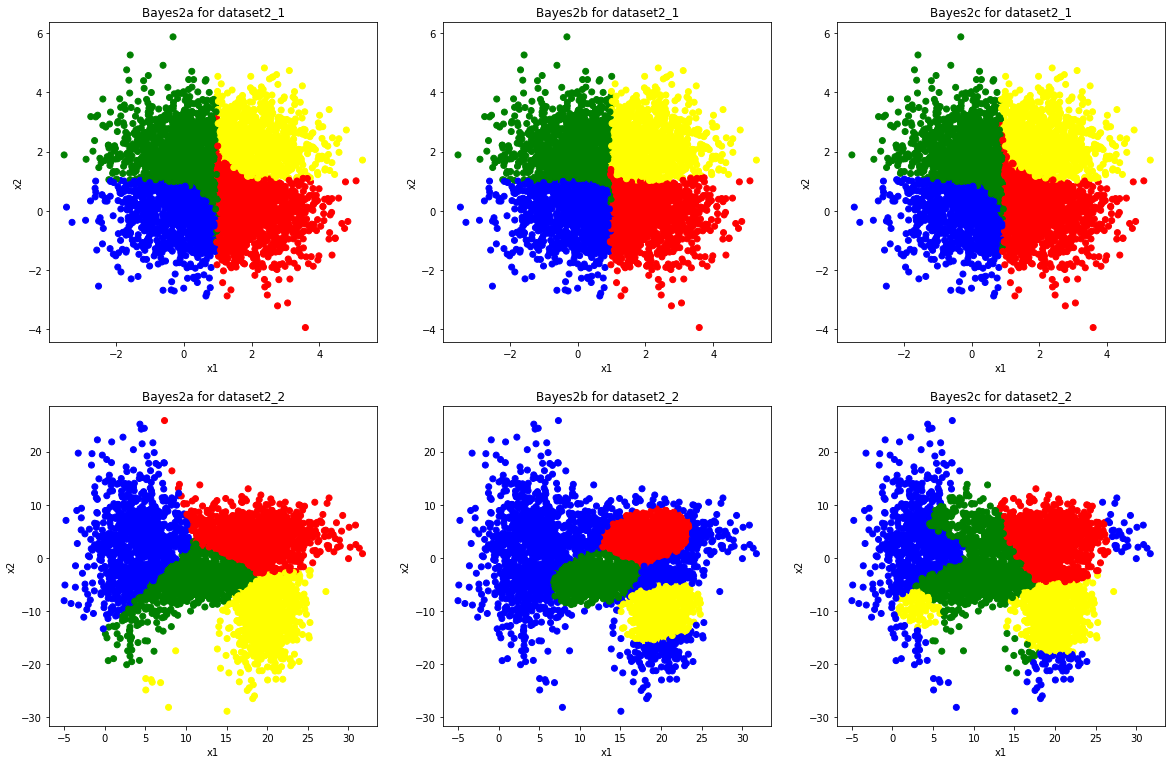

In [31]:
# Cell type : CodeWrite
import matplotlib
data_1=np.load('/content/drive/My Drive/Data/dataset2_1.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])
plt.figure(figsize=[20,20])

y_pred=Bayes2a(a[0],a[1],a[2])
colors=['b','g','r','yellow']
plt.subplot(3,3,1)
#plt.scatter(a[2][:,0],a[2][:,1], c=y_pred, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(a[0][:,0],a[0][:,1],c=Bayes2a(a[0],a[1],a[0]),cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Bayes2a for dataset2_1')

y_pred=Bayes2b(a[0],a[1],a[2])
plt.subplot(3,3,2)
#plt.scatter(a[2][:,0],a[2][:,1], c=y_pred, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(a[0][:,0],a[0][:,1],c=Bayes2b(a[0],a[1],a[0]),cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Bayes2b for dataset2_1')

y_pred=Bayes2c(a[0],a[1],a[2])
plt.subplot(3,3,3)
#plt.scatter(a[2][:,0],a[2][:,1], c=y_pred, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(a[0][:,0],a[0][:,1],c=Bayes2c(a[0],a[1],a[0]),cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Bayes2c for dataset2_1')

L=np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
y_pred=Bayes2a(a[0],a[1],a[2])
loss=[]
l=0
for i in range(len(a[3])):
  l=l+(L[int(a[3][i]-1)][int(y_pred[i]-1)])
loss.append(l)


l=0
y_pred=Bayes2b(a[0],a[1],a[2])
for i in range(len(a[3])):
  l=l+(L[int(a[3][i]-1)][int(y_pred[i]-1)])
loss.append(l)


l=0
y_pred=Bayes2c(a[0],a[1],a[2])
for i in range(len(a[3])):
  l=l+(L[int(a[3][i]-1)][int(y_pred[i]-1)])
loss.append(l)



data_1=np.load('/content/drive/My Drive/Data/dataset2_2.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])

y_pred=Bayes2a(a[0],a[1],a[2])
plt.subplot(3,3,4)
#plt.scatter(a[2][:,0],a[2][:,1], c=y_pred, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(a[0][:,0],a[0][:,1],c=Bayes2a(a[0],a[1],a[0]),cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Bayes2a for dataset2_2')

y_pred=Bayes2b(a[0],a[1],a[2])
plt.subplot(3,3,5)
#plt.scatter(a[2][:,0],a[2][:,1], c=y_pred, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(a[0][:,0],a[0][:,1],c=Bayes2b(a[0],a[1],a[0]),cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Bayes2b for dataset2_2')

y_pred=Bayes2c(a[0],a[1],a[2])
plt.subplot(3,3,6)
#plt.scatter(a[2][:,0],a[2][:,1], c=y_pred, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(a[0][:,0],a[0][:,1],c=Bayes2c(a[0],a[1],a[0]),cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Bayes2c for dataset2_2')

l=0                                  ## Loss calculating
y_pred=Bayes2a(a[0],a[1],a[2])
for i in range(len(a[3])):
  l=l+(L[int(a[3][i]-1)][int(y_pred[i]-1)])
loss.append(l)

l=0
y_pred=Bayes2b(a[0],a[1],a[2])
for i in range(len(a[3])):
  l=l+(L[int(a[3][i]-1)][int(y_pred[i]-1)])
loss.append(l)

l=0
y_pred=Bayes2c(a[0],a[1],a[2])
for i in range(len(a[3])):
  l=l+(L[int(a[3][i]-1)][int(y_pred[i]-1)])
loss.append(l)

confusion_matrix=np.zeros((4,4))   ##Confusion Matrix 
for i in range(len(a[3])):
  confusion_matrix[int(a[3][i]-1)][int(y_pred[i]-1)]+=1
confusion_matrix=confusion_matrix/4000; 

** Cell type : TextWrite ** 
### **Expected Loss :**
(the average can be taken by dividing each entry by total no. of test samples)

|Data | Bayes2a| Bayes2b | Bayes2c |
| --- | --- | --- | --- |
|dataset2_1| 1719 | 1716 | 1717 |
|dataset2_2| 734 | 2029 |1335|

**Confusion Matrix:**

| | Predicted_1| Predicted_2 | Predicted_3 |Predicted_4|
| --- | --- | --- | --- | ---|
|Actual_1|0.16375| 0.06925 |0.00025| 0.01675|
|Actual_2| 0.00825| 0.20525 |0.02325| 0.01325|
|Actual_3|0.00775 |0.0435  |0.1985|  0.00025 |
|Actual_4| 0.0155  |0.00875| 0.0325|  0.19325|

**Observations:**

1) Bayes2a performs well with dataset2_2(least loss) this is because, in dataset2_2 the datapoints(X1,X2) for all 4 class labels are not correlated. For Two class labels x1,x2 are horizontal and for other two class labels they are vertical, implying X1 and X2 are not related and the covariance is 0. Hence, the Bayes2a performs well with that data, because here it assumes that covariance is identity which is true for this data.

2) Dataset2_1 has equal loss with all three models. This is because the assumption used for three models are not matching with the data. 


**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




Degree= 1 lambda= 1e-07
Bias_squared = 5.241163554681631
Variance = 0.3922109134162532
MSE = 5.785078766597295
Degree= 1 lambda= 1e-05
Bias_squared = 5.397424423482149
Variance = 0.368789769406282
MSE = 5.777553843877812
Degree= 1 lambda= 0.001
Bias_squared = 5.31362903055501
Variance = 0.36233791859976
MSE = 5.665084011444987
Degree= 1 lambda= 0.1
Bias_squared = 5.43218619439049
Variance = 0.3343407757031968
MSE = 5.732174390972875
Degree= 1 lambda= 10.0
Bias_squared = 6.536153695532329
Variance = 0.17604850899072555
MSE = 6.618929521009224
Degree= 1 lambda= 1000.0
Bias_squared = 30.706754387514874
Variance = 0.0006725480729243989
MSE = 31.07705094111916
Degree= 2 lambda= 1e-07
Bias_squared = 3.4408300873722792
Variance = 0.594816548948612
MSE = 4.170816028019166
Degree= 2 lambda= 1e-05
Bias_squared = 3.2817803753001575
Variance = 0.5066281822482998
MSE = 4.009974107176766
Degree= 2 lambda= 0.001
Bias_squared = 3.425531696400385
Variance = 0.6471542139239476
MSE = 4.020167167127633
De

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Degree= 2 lambda= 10.0
Bias_squared = 6.109361326082567
Variance = 0.19446529695357298
MSE = 6.216612763392133
Degree= 2 lambda= 1000.0
Bias_squared = 30.53194764767667
Variance = 0.0009593020420927081
MSE = 31.82334810537532
Degree= 4 lambda= 1e-07
Bias_squared = 0.6637664816357858
Variance = 0.7133469522971718
MSE = 1.4070017727782032
Degree= 4 lambda= 1e-05
Bias_squared = 0.7610782304714245
Variance = 0.742599414118422
MSE = 1.7804896857502226
Degree= 4 lambda= 0.001
Bias_squared = 0.6477854284427897
Variance = 0.809201733855621
MSE = 1.3999790110182084
Degree= 4 lambda= 0.1
Bias_squared = 0.87943790452888
Variance = 0.41428960883221444
MSE = 1.2984337791111136
Degree= 4 lambda= 10.0
Bias_squared = 5.977266545085436
Variance = 0.22466678912784438
MSE = 6.157594773573233
Degree= 4 lambda= 1000.0
Bias_squared = 30.919999522390896
Variance = 0.0012901915053140118
MSE = 31.20386904372721
Degree= 8 lambda= 1e-07
Bias_squared = 0.6927718057570003
Variance = 23.779477783806833
MSE = 20.947

<Figure size 432x288 with 0 Axes>

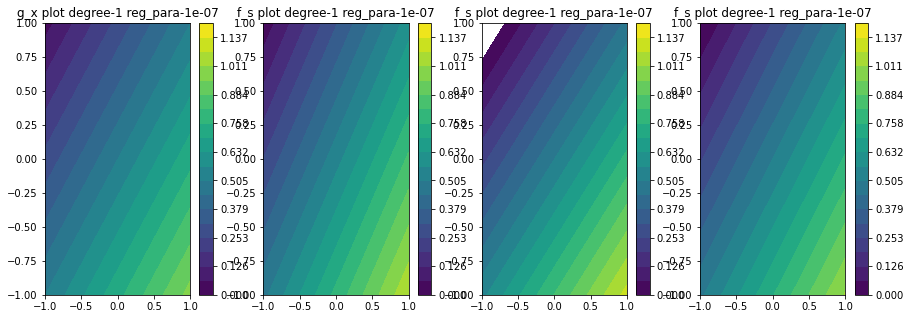

<Figure size 432x288 with 0 Axes>

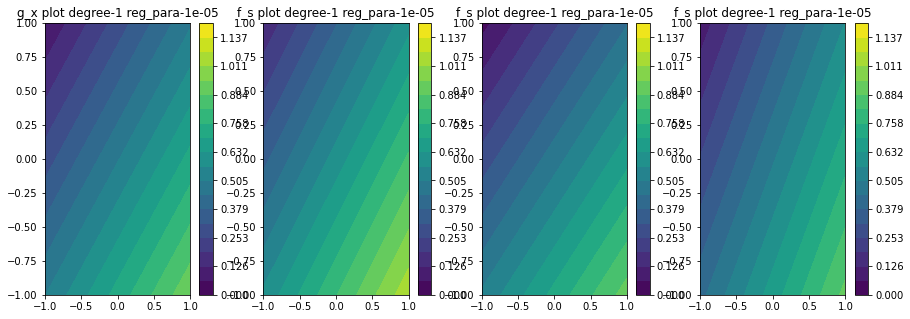

<Figure size 432x288 with 0 Axes>

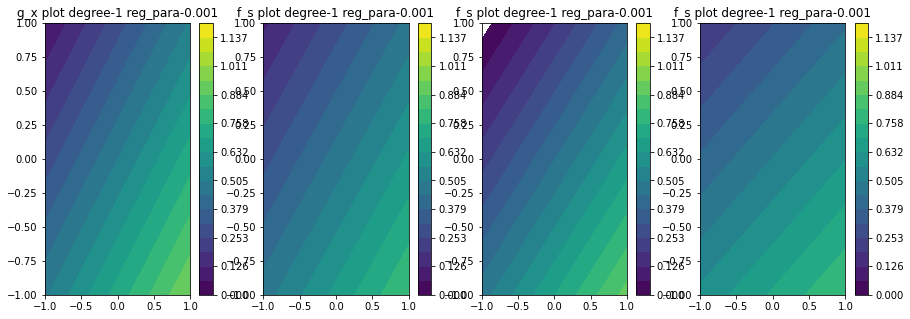

<Figure size 432x288 with 0 Axes>

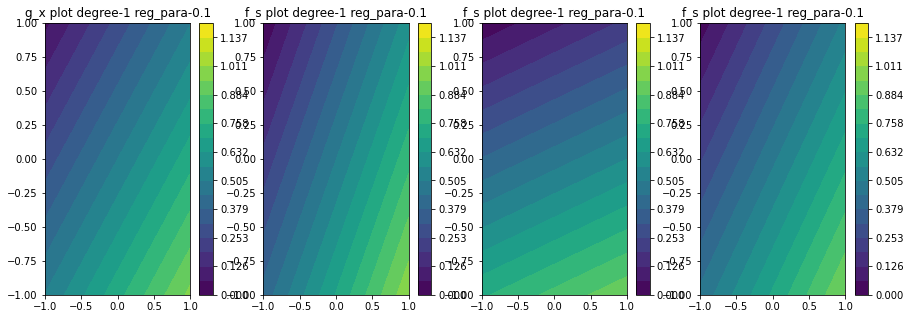

<Figure size 432x288 with 0 Axes>

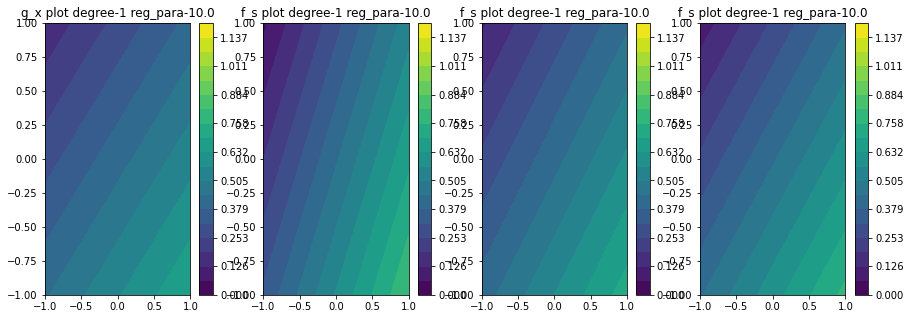

<Figure size 432x288 with 0 Axes>

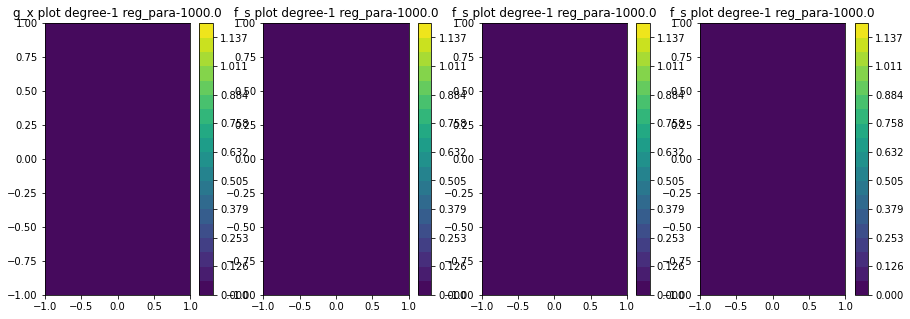

<Figure size 432x288 with 0 Axes>

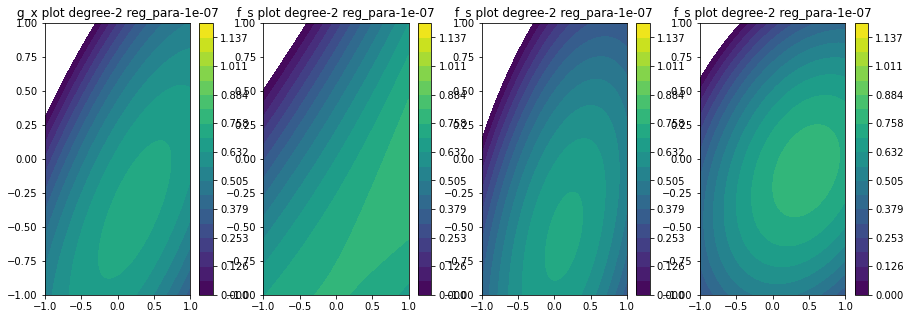

<Figure size 432x288 with 0 Axes>

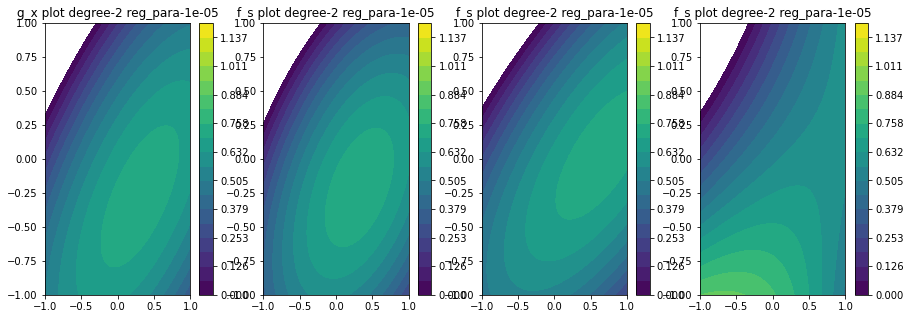

<Figure size 432x288 with 0 Axes>

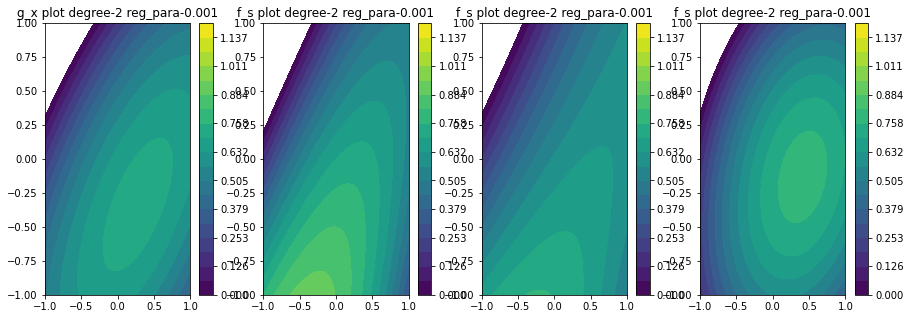

<Figure size 432x288 with 0 Axes>

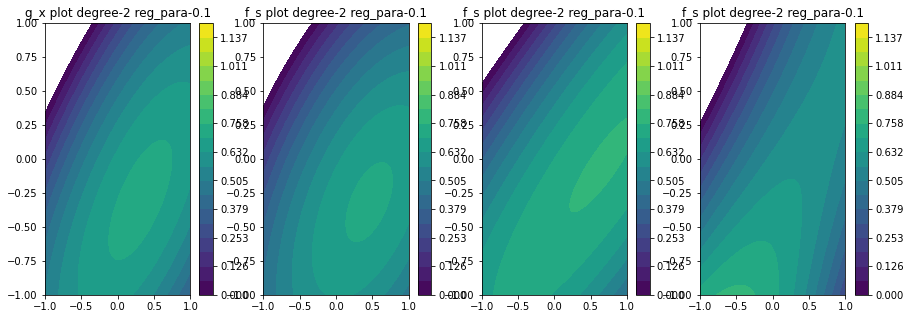

<Figure size 432x288 with 0 Axes>

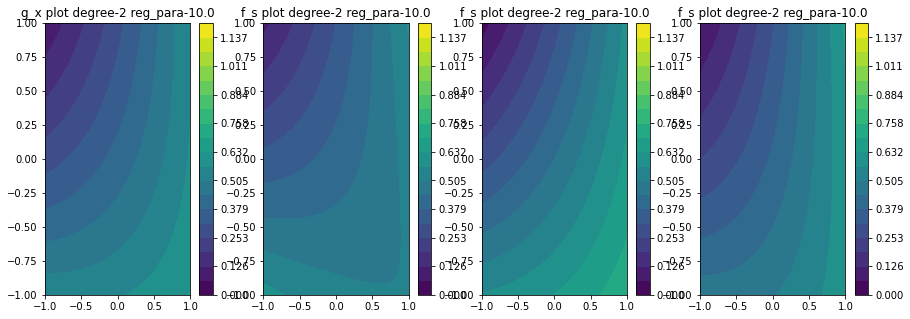

<Figure size 432x288 with 0 Axes>

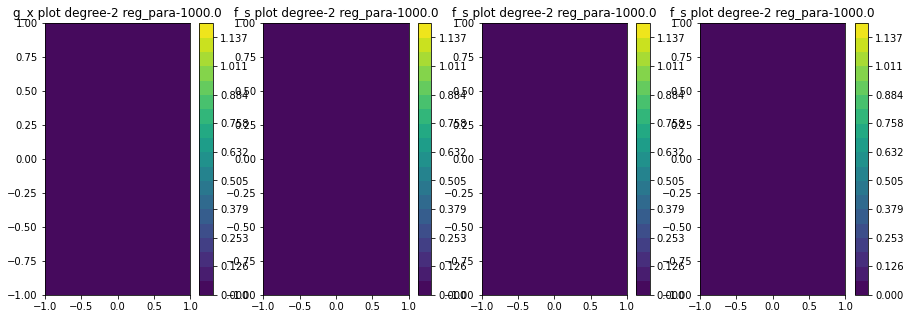

<Figure size 432x288 with 0 Axes>

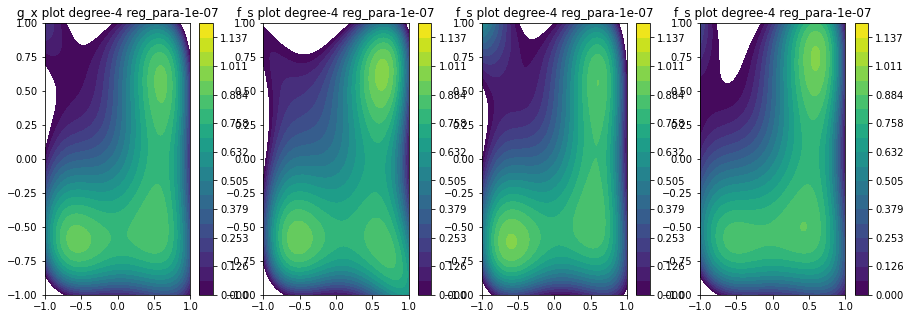

<Figure size 432x288 with 0 Axes>

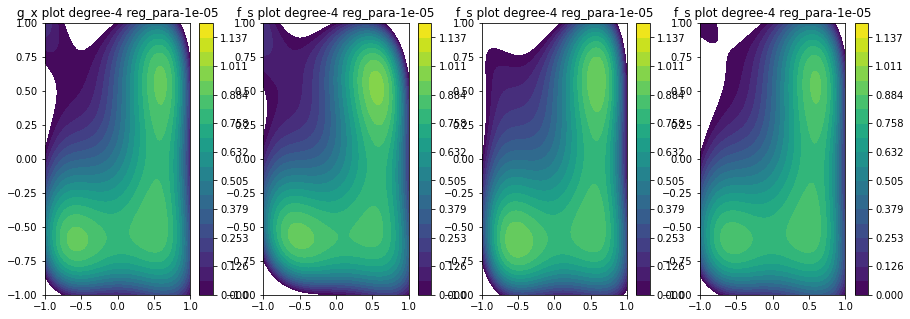

<Figure size 432x288 with 0 Axes>

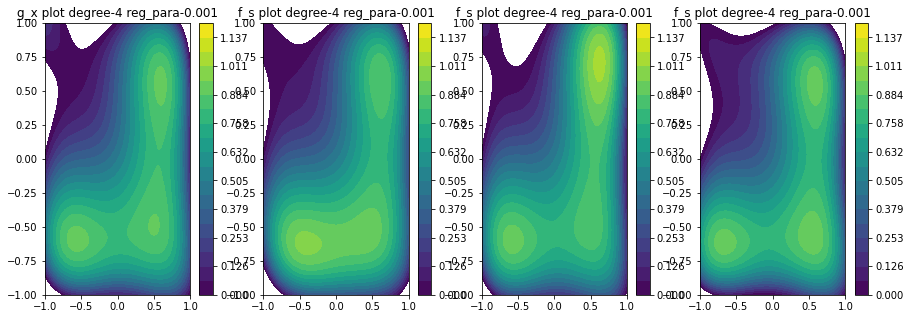

<Figure size 432x288 with 0 Axes>

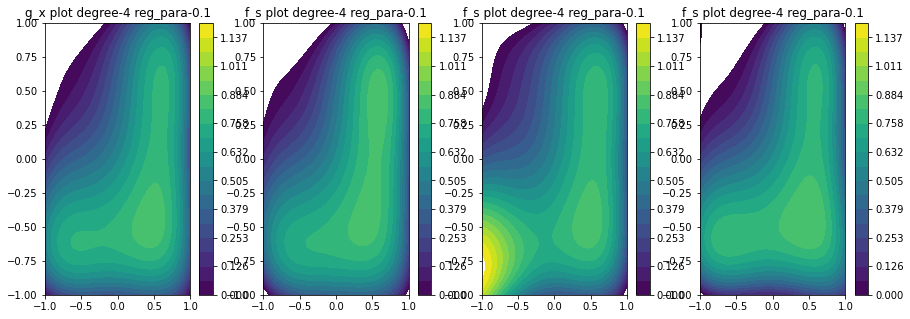

<Figure size 432x288 with 0 Axes>

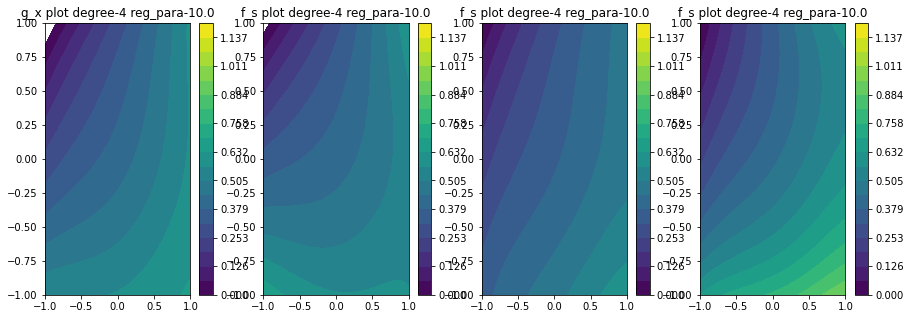

<Figure size 432x288 with 0 Axes>

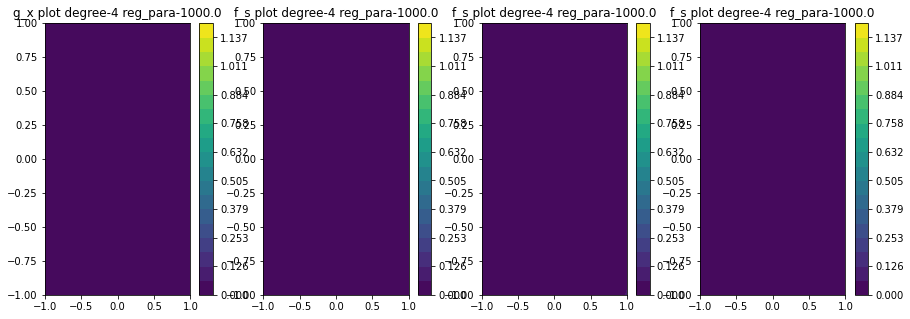

<Figure size 432x288 with 0 Axes>

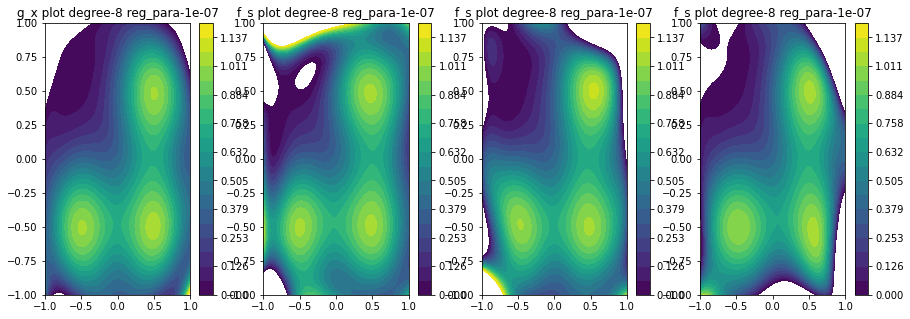

<Figure size 432x288 with 0 Axes>

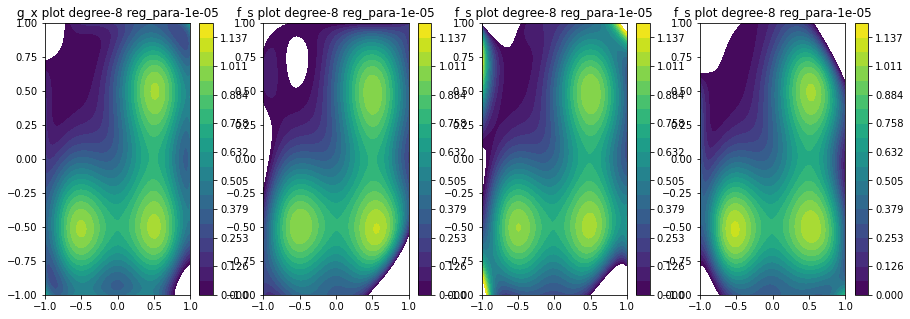

<Figure size 432x288 with 0 Axes>

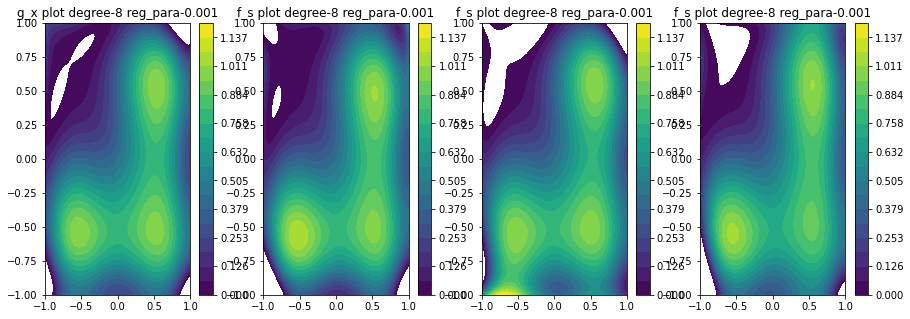

<Figure size 432x288 with 0 Axes>

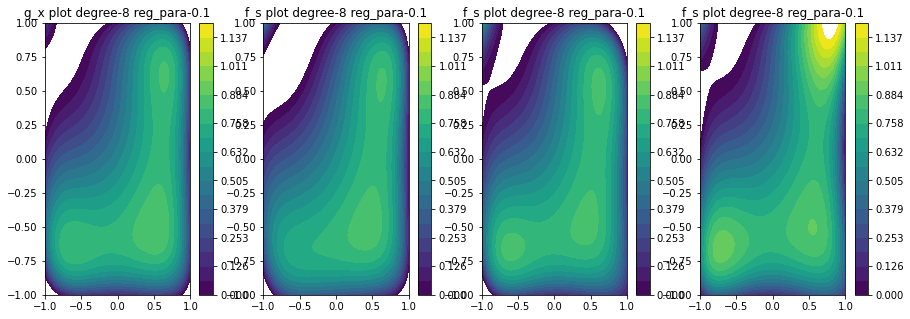

<Figure size 432x288 with 0 Axes>

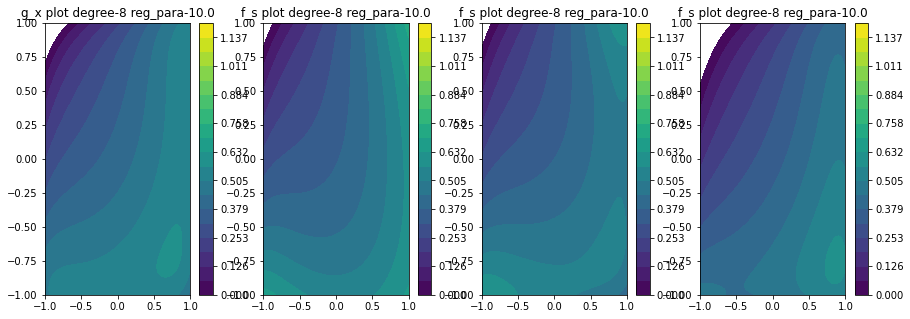

<Figure size 432x288 with 0 Axes>

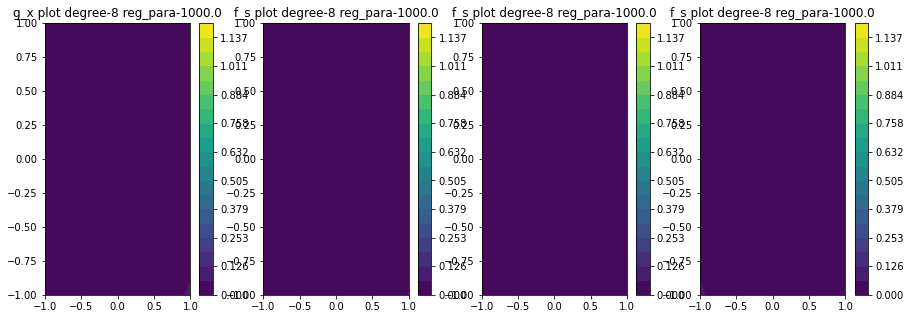

<Figure size 432x288 with 0 Axes>

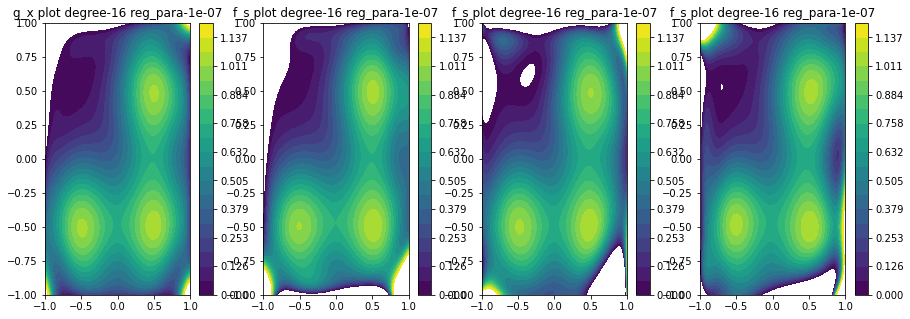

<Figure size 432x288 with 0 Axes>

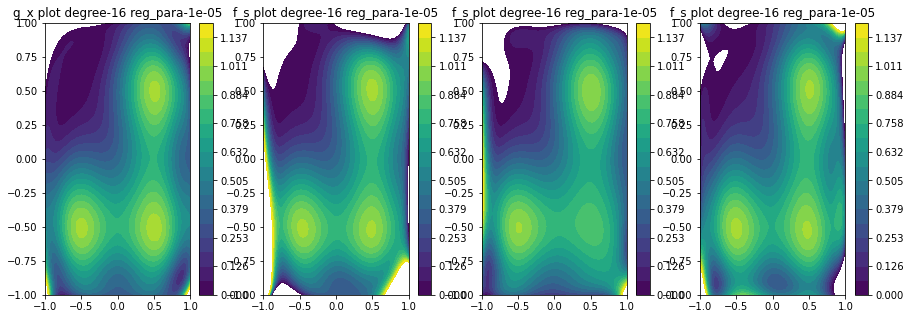

<Figure size 432x288 with 0 Axes>

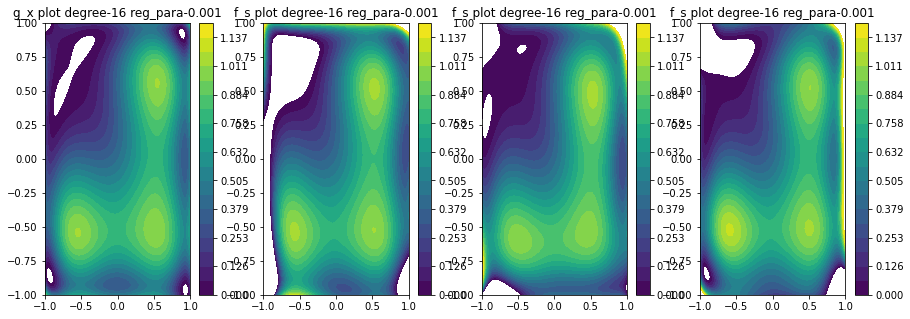

<Figure size 432x288 with 0 Axes>

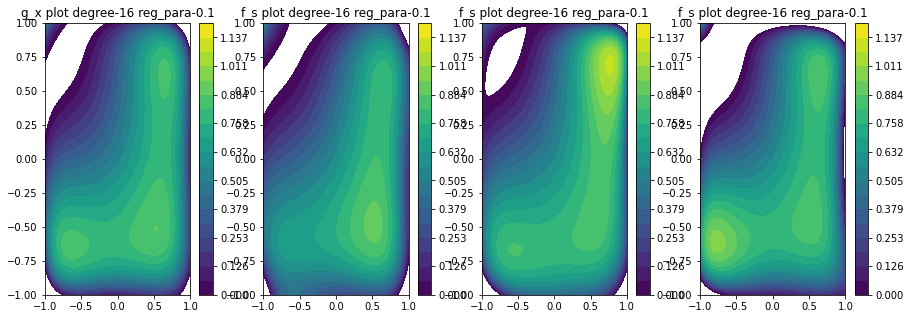

<Figure size 432x288 with 0 Axes>

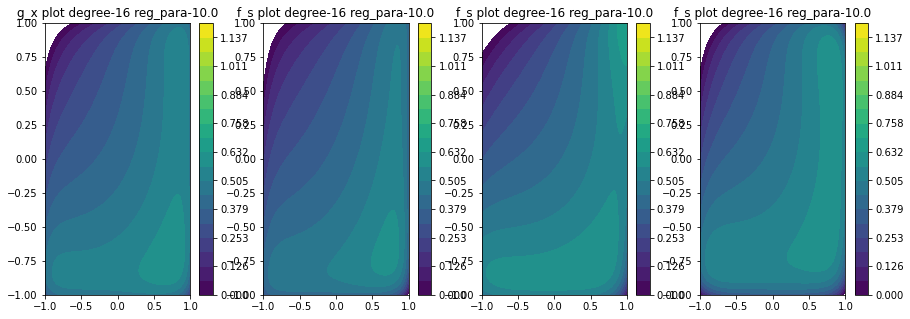

<Figure size 432x288 with 0 Axes>

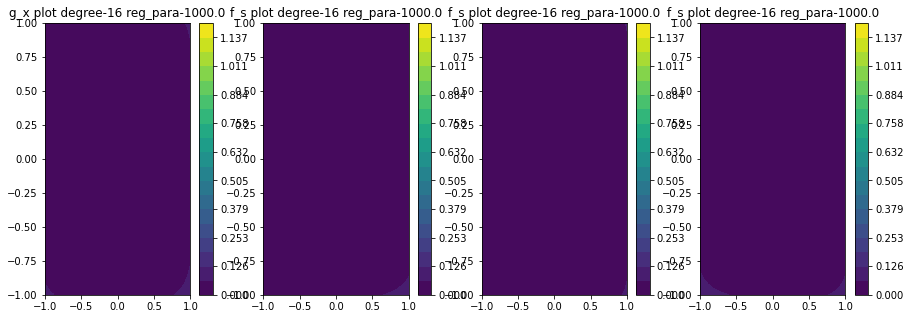

In [14]:
# Cell type : CodeWrite

def polynomial_features(X,degree):
  feature_mapped_vector=[]
  for data in X:
    for i in range(degree+1):
      for j in range(i+1):
        feature_mapped_vector.append((data[0]**j)*data[1]**(i-j))
  return np.array(feature_mapped_vector).reshape(-1,int(np.math.factorial(2+degree)/(np.math.factorial(2)*np.math.factorial(degree))))

def polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param):
    W = np.dot(np.linalg.inv(np.dot(np.array(X_train).transpose(),np.array(X_train))+ reg_param*np.identity(len(X_train[0]))),np.dot(np.array(X_train).transpose(),Y_train))
    return W

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
  Y_test_pred=[]
  Y_test_pred.append(np.dot(X_test,wt_vector))
  return(Y_test_pred[0])    

    
    
def visualise_polynomial_2d(wt_vector, degree, title=""):
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    Z= np.zeros((100,100))
    for i in range(100):
        for j in range(100):
            feature = polynomial_features(np.array([[X[i][j],Y[i][j]]]),degree)
            Z[i][j] = np.dot(wt_vector,np.transpose(feature))
    plt.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20))
    plt.title(title)
    plt.colorbar()
    
    
    
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    X=np.random.uniform(-1,1,[10000,2])
    Y=[]
    index_list=[]
    for i in range(len(X)):
      Y.append(np.exp(-4*((X[i]-[[0.5,0.5]])**2).sum())+np.exp(-4*((X[i]-[[-0.5,-0.5]])**2).sum())+np.exp(-4*((X[i]-[[0.5,-0.5]])**2).sum()))
    weights=[]
    for i in range(100):
      index = np.random.choice(X.shape[0], 50,replace=False)
      index_list.append(index)  
      X_train=X[index]
      X_poly=polynomial_features(X_train,degree)
      weights.append(polynomial_regression_ridge_train(X_poly,np.array([Y[x] for x in index]),degree,reg_param))
    g=np.mean(weights,axis=0)
    plt.figure(figsize=[15,5])
    plt.subplot(1,4,1)
    visualise_polynomial_2d(g, degree, title='g_x plot degree-'+str(degree)+' reg_para-'+str(reg_param))
    plt.subplot(1,4,2)
    visualise_polynomial_2d(weights[0], degree, title='f_s plot degree-'+str(degree)+' reg_para-'+str(reg_param))
    plt.subplot(1,4,3)
    visualise_polynomial_2d(weights[1], degree, title='f_s plot degree-'+str(degree)+' reg_para-'+str(reg_param))
    plt.subplot(1,4,4)
    visualise_polynomial_2d(weights[2], degree, title='f_s plot degree-'+str(degree)+' reg_para-'+str(reg_param))

    variance=0
    for i in range(100):
      index = np.random.choice(X.shape[0], 50,replace=False)
      X_poly=polynomial_features(X[index],degree)
      variance = variance + np.mean((polynomial_regression_ridge_pred(X_poly,weights[i]) - polynomial_regression_ridge_pred(X_poly,g))**2)
   
    bias = 0
    for i in range(100):
      index = np.random.choice(X.shape[0], 50,replace=False)
      X_poly=polynomial_features(X[index],degree)
      bias = bias + np.mean((polynomial_regression_ridge_pred(X_poly,g)-np.array([Y[x] for x in index]))**2)

    error =0
    for i in range(100):
      index = np.random.choice(X.shape[0], 50,replace=False)
      X_poly=polynomial_features(X[index],degree)
      error = error + np.mean((polynomial_regression_ridge_pred(X_poly,weights[i])- np.array([Y[x] for x in index]))**2)


    return bias,variance,error
a=-1
bias=np.ones((5,6))
variance=np.ones((5,6))
for degree in [1,2,4,8,16]:
  a+=1
  b=-1
  for reg_param in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
        b+=1
        plt.figure()
        bi,v,e = compute_BV_error_sample_plot(degree, reg_param)
        bias[a][b]=bi
        variance[a][b]=v
        print('================================')
        print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        print('Bias_squared = '+str(bi))
        print('Variance = '+str(v))
        print('MSE = '+str(e))

** Cell type: TextWrite **
### **Conclusions:**

1) We can conclude that bias_squared+variance=error

2) Also, from the table it is clear that as degree of the model increases the complexity increases, in turn the variance increases and bias decreases. 

3) And as reg_param increases the model's overfit is reduced, in turn the variance decreases and bias increases.

4) From the plots we can see for example degree=16, reg_param=1e-07 the g_x contour plot is very different from the f_x plot for three different samples. This is because the variance is high for degree=16, reg_param=1e-07. 



**BIAS SQUARED**

| | 1e-7|1e-5 | 0.001 |0.1|10 |1000|
| --- | --- | --- | --- | ---| --- | --- |
|1| 5.08386156| 5.59938985|  5.2855513 |  5.39864217|  6.4973703| 32.01502218|
|2|3.44330326|  3.40168784 | 3.54363235 | 3.36814326 | 6.56015853 | 31.10162692|
|4|0.66003761|  0.74252027|  0.7323108|  0.91391883 | 6.03048467| 30.93903726|
|8| 0.64168352| 0.21690217|  0.47655431|  0.91318118|  5.8787977|30.5237411|
| 16|2.0890391|  1.01345866 | 0.67719106|  1.11064621|  5.23897115|30.98753618|

**VARIANCE**


| | 1e-7|1e-5 | 0.001 |0.1|10 |1000|
| --- | --- | --- | --- | ---| --- | --- |
|1| 3.60882134e-01| 4.41690720e-01| 3.40070477e-01| 3.47279737e-01|1.81840010e-01|7.70712376e-04|
|2|5.58104780e-01|5.11522710e-01| 5.30823647e-01| 5.68684804e-01|1.53103013e-01| 7.54678618e-04|
|4|1.38324111e+00| 5.34710917e-01| 8.28401503e-01| 4.04810402e-01|2.12395428e-01| 9.72643540e-04|
|8| 2.55196127e+01| 5.59733060e+00| 1.66570467e+00| 5.87201263e-01|2.07081142e-01| 1.38666533e-03|
| 16|2.81946069e+01| 1.32210054e+01| 6.79131179e+00| 1.11380452e+00|2.38440080e-01| 1.74655711e-03|




** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




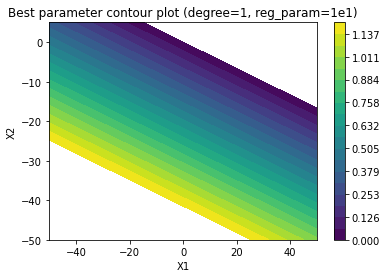

In [17]:
# Cell type : CodeWrite 
import matplotlib
data_1=np.load('/content/drive/My Drive/Data/dataset4_1.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])
def mse(Y_train,Y_pred):
  return np.mean((Y_train-Y_pred)**2)

matrix=np.ones((5,6))
x=0
index = np.random.choice(a[0].shape[0], 50,replace=False)
X=a[0][index]
Y=a[1][index]
for i in [1,2,4,8,16]:
  y=0
  for j in [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]:
    w=polynomial_regression_ridge_train(X,Y,i,j)
    y_pred=polynomial_regression_ridge_pred(a[0],w)
    matrix[x][y]=mse(y_pred,a[1])
    y=y+1
  x=x+1

matrix=np.ones((5,6))
x=0
for i in [1,2,4,8,16]:
  y=0
  for j in [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]:
    w=polynomial_regression_ridge_train(X,Y,i,j)
    y_pred=polynomial_regression_ridge_pred(a[2],w)
    matrix[x][y]=mse(y_pred,a[3])
    y=y+1
  x=x+1


matrix=np.ones((5,6))
index = np.random.choice(a[0].shape[0], 100,replace=False)
X=a[0][index]
Y=a[1][index]
x=0
for i in [1,2,4,8,16]:
  y=0
  for j in [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]:
    w=polynomial_regression_ridge_train(X,Y,i,j)
    y_pred=polynomial_regression_ridge_pred(a[0],w)
    matrix[x][y]=mse(y_pred,a[1])
    y=y+1
  x=x+1

matrix=np.ones((5,6))
x=0
for i in [1,2,4,8,16]:
  y=0
  for j in [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]:
    w=polynomial_regression_ridge_train(X,Y,i,j)
    y_pred=polynomial_regression_ridge_pred(a[2],w)
    matrix[x][y]=mse(y_pred,a[3])
    y=y+1
  x=x+1


index = np.random.choice(a[0].shape[0], 200,replace=False)
X=a[0][index]
Y=a[1][index]
matrix=np.ones((5,6))
x=0
for i in [1,2,4,8,16]:
  y=0
  for j in [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]:
    w=polynomial_regression_ridge_train(X,Y,i,j)
    y_pred=polynomial_regression_ridge_pred(a[0],w)
    matrix[x][y]=mse(y_pred,a[1])
    y=y+1
  x=x+1

matrix=np.ones((5,6))
x=0
for i in [1,2,4,8,16]:
  y=0
  for j in [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]:
    w=polynomial_regression_ridge_train(X,Y,i,j)
    y_pred=polynomial_regression_ridge_pred(a[2],w)
    matrix[x][y]=mse(y_pred,a[3])
    y=y+1
  x=x+1

matrix=np.ones((5,6))
x=0
for i in [1,2,4,8,16]:
  y=0
  for j in [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]:
    w=polynomial_regression_ridge_train(a[0][:1000],a[1][:1000],i,j)
    y_pred=polynomial_regression_ridge_pred(a[0],w)
    matrix[x][y]=mse(y_pred,a[1])
    y=y+1
  x=x+1

matrix=np.ones((5,6))
x=0
for i in [1,2,4,8,16]:
  y=0
  for j in [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]:
    w=polynomial_regression_ridge_train(a[0][:1000],a[1][:1000],i,j)
    y_pred=polynomial_regression_ridge_pred(a[2],w)
    matrix[x][y]=mse(y_pred,a[3])
    y=y+1
  x=x+1

w=polynomial_regression_ridge_train(a[0][:1000],a[1][:1000], 16,1e1)
X,Y = np.meshgrid(np.linspace(-50,50,100), np.linspace(-50,5,100))
Z= np.zeros((100,100))
for i in range(100):
    for j in range(100):
        feature = polynomial_features(np.array([[X[i][j],Y[i][j]]]),1)
        Z[i][j] = np.dot(w,feature[0][1:])
plt.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20))
plt.title('Best parameter contour plot (degree=1, reg_param=1e1)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar()

** Cell type : TextWrite **

### **Observations:**

1) The least test error is obtained at degree=1(all degrees have same test error) and reg_param=10

2) The least test error is obtained for 1000 sample size.

3) We can observe that always the train error is small compared to test error. This is because the model is trained using training data. Hence it performs well with training data.

4) As, reg_param increases the error is decreasing. This is because first the model fits data perfectly and after increasing reg_param the penalty term has high weightage, in turn reducing the overfit of the model.

5) More is the sample size, less is the error. 


## **For the tables columns are regularization parameter and rows are degree**
Sample size=50

**1) Train error:**


| | 1e-9|1e-7 | 1e-5 |1e-3|0.1 |10|
| --- | --- | --- | --- | ---| --- | --- |
|1|0.24682735 |0.24682735 |0.24682735 |0.24682694 |0.24678676| 0.24449978
|2|0.24682735 |0.24682735 |0.24682735 |0.24682694 |0.24678676 |0.24449978
|4|0.24682735 |0.24682735 |0.24682735 |0.24682694 |0.24678676 |0.24449978
|8|0.24682735 |0.24682735 |0.24682735 |0.24682694 |0.24678676 |0.24449978
| 16|0.24682735| 0.24682735| 0.24682735| 0.24682694| 0.24678676| 0.24449978


**2) Test error:**

| | 1e-9|1e-7 | 1e-5 |1e-3|0.1 |10|
| --- | --- | --- | --- | ---| --- | --- |
|1|0.27017605 |0.27017605| 0.27017604| 0.27017559| 0.27013062| 0.26754884|
|2|0.27017605 |0.27017605 |0.27017604| 0.27017559 |0.27013062 |0.26754884|
|4|0.27017605 |0.27017605 |0.27017604 |0.27017559 |0.27013062 |0.26754884|
|8|0.27017605 |0.27017605 |0.27017604 |0.27017559 |0.27013062 |0.26754884|
| 16|0.27017605| 0.27017605| 0.27017604| 0.27017559 |0.27013062| 0.26754884|

 Sample size = 100

 **1)Training Error:**

| | 1e-9|1e-7 | 1e-5 |1e-3|0.1 |10|
| --- | --- | --- | --- | ---| --- | --- |
|1|0.24580739 |0.24580739 |0.24580739| 0.24580714| 0.24578222 |0.24418323|
|2|0.24580739 |0.24580739 |0.24580739| 0.24580714 |0.24578222 |0.24418323|
|4|0.24580739 |0.24580739 |0.24580739| 0.24580714 |0.24578222 |0.24418323
|8|0.24580739 |0.24580739 |0.24580739 |0.24580714 |0.24578222 |0.24418323
| 16|0.24580739| 0.24580739| 0.24580739| 0.24580714 |0.24578222| 0.24418323


**2) Test error:**

| | 1e-9|1e-7 | 1e-5 |1e-3|0.1 |10|
| --- | --- | --- | --- | ---| --- | --- |
|1|0.27115468|0.27115468 |0.27115468| 0.27115434 |0.27112112 |0.26888878
|2|0.27115468 |0.27115468 |0.27115468| 0.27115434 |0.27112112 |0.26888878
|4|0.27115468 |0.27115468 |0.27115468 |0.27115434 |0.27112112 |0.26888878
|8|0.27115468 |0.27115468 |0.27115468 |0.27115434 |0.27112112 |0.26888878
| 16|0.27115468| 0.27115468| 0.27115468| 0.27115434| 0.27112112| 0.26888878

Sample size = 200

**1) Train error:**

| | 1e-9|1e-7 | 1e-5 |1e-3|0.1 |10|
| --- | --- | --- | --- | ---| --- | --- |
|1|0.24403236 |0.24403236 |0.24403236| 0.24403233 |0.2440289  |0.24375199
|2|0.24403236 |0.24403236 |0.24403236 |0.24403233 |0.2440289 | 0.24375199
|4|0.24403236 |0.24403236 |0.24403236 |0.24403233 |0.2440289  |0.24375199
|8|0.24403236 |0.24403236 |0.24403236 |0.24403233 |0.2440289  |0.24375199
| 16|0.24403236| 0.24403236 |0.24403236| 0.24403233 |0.2440289 | 0.24375199

**2) Test error:**

| | 1e-9|1e-7 | 1e-5 |1e-3|0.1 |10|
| --- | --- | --- | --- | ---| --- | --- |
|1|0.26632404 |0.26632404 |0.26632404 |0.26632401 |0.26632096| 0.26607869
|2|0.26632404 |0.26632404 |0.26632404| 0.26632401 |0.26632096 |0.26607869
|4|0.26632404 |0.26632404 |0.26632404 |0.26632401 |0.26632096 |0.26607869
|8|0.26632404 |0.26632404 |0.26632404 |0.26632401 |0.26632096 |0.26607869
|16|0.26632404 |0.26632404| 0.26632404 |0.26632401| 0.26632096 |0.26607869

Sample size=1000

**1) Train error:**

| | 1e-9|1e-7 | 1e-5 |1e-3|0.1 |10|
| --- | --- | --- | --- | ---| --- | --- |
|1|0.24267626| 0.24267626 |0.24267626 |0.24267626 |0.24267626| 0.24267654
|2|0.24267626 |0.24267626 |0.24267626 |0.24267626 |0.24267626 |0.24267654
|4|0.24267626 |0.24267626 |0.24267626 |0.24267626 |0.24267626 |0.24267654
|8|0.24267626 |0.24267626 |0.24267626 |0.24267626 |0.24267626 |0.24267654
| 16|0.24267626| 0.24267626 |0.24267626| 0.24267626| 0.24267626| 0.24267654


**2) Test error:**

| | 1e-9|1e-7 | 1e-5 |1e-3|0.1 |10|
| --- | --- | --- | --- | ---| --- | --- |
|1|0.26591434| 0.26591434 |0.26591434| 0.26591434 |0.26591416 |0.26589756
|2|0.26591434 |0.26591434 |0.26591434 |0.26591434 |0.26591416 |0.26589756
|4|0.26591434 |0.26591434 |0.26591434 |0.26591434 |0.26591416 |0.26589756
|8|0.26591434 |0.26591434 |0.26591434 |0.26591434 |0.26591416 |0.26589756
| 16|0.26591434| 0.26591434| 0.26591434 |0.26591434| 0.26591416 |0.26589756






** Cell type : TextRead **

# Problem 5 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.












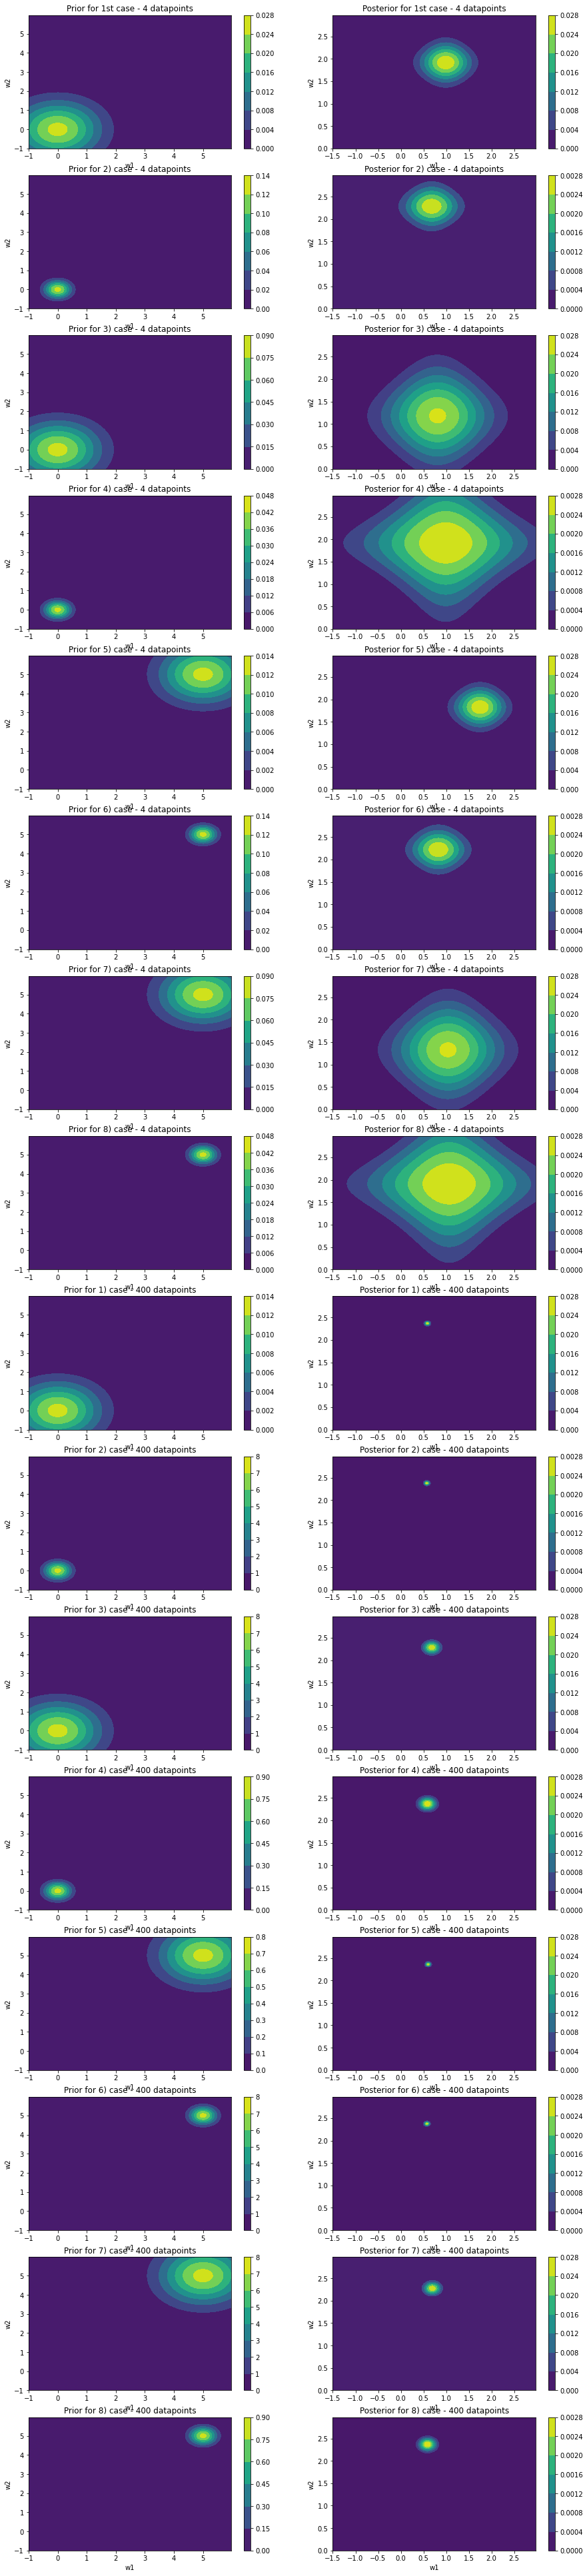

In [16]:
 # Cell type : CodeWrite 
def prior(mean,t_squared):  #mean=value of mu1 or mu2 as both are equal.
  delta = 0.025              #t_squared τ2
  x = np.arange(-1, 6, delta)
  y = np.arange(-1, 6, delta)
  X, Y = np.meshgrid(x, y)
  cov=t_squared*np.eye(2)
  Z1 = (np.exp(-0.5*t_squared*((X-mean)**2+(Y-mean)**2)))/((2*np.pi)**(cov.shape[0])*(np.abs(np.linalg.det(cov))**0.5))
  plt.contourf(X,Y,Z1)

def posterior(mean_,X_,y_,t_squared,sigma_sq): #mean_ [mu1,mu2]; X_ and Y_ are data, t_squared: τ2; sigma_sq: σ2
  delta = 0.025
  x = np.arange(-1.5, 3, delta)
  y = np.arange(0, 3, delta)
  X, Y = np.meshgrid(x, y)
  cov_inv=(1/sigma_sq)*(np.matmul(np.transpose(X_),X_))+np.linalg.inv(t_squared*np.eye(2))
  cov=np.linalg.inv(cov_inv)
  mean=(1/sigma_sq)*np.matmul(np.linalg.inv(cov_inv),(np.matmul(mean_,np.linalg.inv(t_squared*np.eye(2)))+np.matmul(np.transpose(X_),y_)))
  Z1 = (np.exp(-0.5*(cov_inv[0,0]*(X-mean[0])**2+(cov_inv[1,1])*(Y-mean[1])**2+(Y-mean[1])**2*((X-mean[0])**2)*(cov_inv[0,1]+cov_inv[1,0]))))/((2*np.pi)**(cov.shape[0])*(np.abs(np.linalg.det(cov))**0.5))
  plt.contourf(X,Y,Z1)

X=np.array([[1. , 2. ],[2. , 2.1],[0.6, 1.5],[1.1, 0.9]])
y=np.array([5.1,6.1,4.2,2.9])
plt.figure(figsize=[15,70])
plt.subplot(16,2,1)
prior(0,1)
plt.title('Prior for 1st case - 4 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
plt.subplot(16,2,2)
plt.title('Posterior for 1st case - 4 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
posterior([0,0],X,y,1,1)
plt.subplot(16,2,3)
plt.title('Prior for 2) case - 4 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
prior(0,10)
plt.subplot(16,2,4)
plt.title('Posterior for 2) case - 4 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
posterior([0,0],X,y,10,1)
plt.subplot(16,2,5)
plt.title('Prior for 3) case - 4 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
prior(0,1)
plt.subplot(16,2,6)
plt.title('Posterior for 3) case - 4 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
posterior([0,0],X,y,1,10)
plt.subplot(16,2,7)
plt.title('Prior for 4) case - 4 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
prior(0,10)
plt.subplot(16,2,8)
plt.title('Posterior for 4) case - 4 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
posterior([0,0],X,y,10,10)

plt.subplot(16,2,9)
plt.title('Prior for 5) case - 4 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
prior(5,1)
plt.subplot(16,2,10)
plt.title('Posterior for 5) case - 4 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
posterior([5,5],X,y,1,1)
plt.subplot(16,2,11)
plt.title('Prior for 6) case - 4 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
prior(5,10)
plt.subplot(16,2,12)
plt.title('Posterior for 6) case - 4 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
posterior([5,5],X,y,10,1)
plt.subplot(16,2,13)
plt.title('Prior for 7) case - 4 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
prior(5,1)
plt.subplot(16,2,14)
plt.title('Posterior for 7) case - 4 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
posterior([5,5],X,y,1,10)
plt.subplot(16,2,15)
plt.title('Prior for 8) case - 4 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
prior(5,10)
plt.subplot(16,2,16)
plt.title('Posterior for 8) case - 4 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
posterior([5,5],X,y,10,10)

X_400=[]
y_400=[]
for i in range(100):
  for j in range(4):
    X_400.append(X[j])
    y_400.append(y[j])
X=np.array(X_400)
y=np.array(y_400)

plt.subplot(16,2,17)
plt.title('Prior for 1) case - 400 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
prior(0,1)
plt.subplot(16,2,18)
plt.title('Posterior for 1) case - 400 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
posterior([0,0],X,y,1,1)
plt.subplot(16,2,19)
plt.title('Prior for 2) case - 400 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
prior(0,10)
plt.subplot(16,2,20)
plt.title('Posterior for 2) case - 400 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
posterior([0,0],X,y,10,1)
plt.subplot(16,2,21)
plt.title('Prior for 3) case - 400 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
prior(0,1)
plt.subplot(16,2,22)
plt.title('Posterior for 3) case - 400 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
posterior([0,0],X,y,1,10)
plt.subplot(16,2,23)
plt.title('Prior for 4) case - 400 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
prior(0,10)
plt.subplot(16,2,24)
plt.title('Posterior for 4) case - 400 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
posterior([0,0],X,y,10,10)

plt.subplot(16,2,25)
plt.title('Prior for 5) case - 400 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
prior(5,1)
plt.subplot(16,2,26)
plt.title('Posterior for 5) case - 400 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
posterior([5,5],X,y,1,1)
plt.subplot(16,2,27)
plt.title('Prior for 6) case - 400 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
prior(5,10)
plt.subplot(16,2,28)
plt.title('Posterior for 6) case - 400 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
posterior([5,5],X,y,10,1)
plt.subplot(16,2,29)
plt.title('Prior for 7) case - 400 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
prior(5,1)
plt.subplot(16,2,30)
plt.title('Posterior for 7) case - 400 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
posterior([5,5],X,y,1,10)
plt.subplot(16,2,31)
plt.title('Prior for 8) case - 400 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
prior(5,10)
plt.subplot(16,2,32)
plt.title('Posterior for 8) case - 400 datapoints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar()
posterior([5,5],X,y,10,10)

**  Cell type : TextWrite **

 **Posterior Distribution:**
 
 w|X,y∼N(µ, Σ)

µ = $σ^−2$ Σ Ψ t (mean)  

$Σ^−1 =σ^−2 Ψ^tΨ + S^-1$ (variance)

S = covariance matrix for prior distribution

Ψ = data matrix(X)

t= target variable(y)

### **Observations:**

1) In the prior plots the cases with variance $10*I$ are some what more spread out compared to variance $1*I$.

2) Posterior plots with noise variance(sigma squared) 10 are more spread out, which implies the W value can be anywhere in between.

3) But in 400 points dataset the Posterior plot of W is almost a point at [0.5,2.3], this is because more points helps us to pinpoint W accurately. Infact the optimum W obtained is also almost near [0.5,2.3].


